#Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import seaborn as sns
import re, string
import nltk
import time

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

# EDA - The Movie Review Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/FY_Project_Phase 1/review.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df_train=df[:335]
df_test=df[335:501]

In [ ]:
df_train.shape

(335, 2)

In [ ]:
df_test.shape

(166, 2)

0    176
1    159
Name: sentiment, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sentiment'>

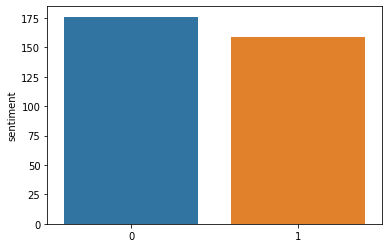

In [ ]:
x=df_train['sentiment'].value_counts()
print(x)
sns.barplot(x.index,x)

# Processing the dataset using NLP techniques
##### Like removal of stopwords, Lemmatization, Tokenization

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_train['clean_text'] = df_train['review'].apply(lambda x: finalpreprocess(x))
df_train.head()
df_train.to_csv('/content/drive/MyDrive/FY_Project_Phase 1/clean_data.csv')

<ipython-input-12-d50919eacd2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['clean_text'] = df_train['review'].apply(lambda x: finalpreprocess(x))


Splitting Dataset into Train-Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"],df_train["sentiment"],test_size=0.2,shuffle=True)

Converting text data to vectors to perform Classification

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

Glimpse of the Vector data

In [ ]:
print(X_train_vectors_tfidf)

  (0, 1304)	0.23861647539670275
  (0, 1951)	0.16617071103896244
  (0, 6522)	0.23861647539670275
  (0, 4340)	0.1879638223088306
  (0, 3729)	0.06830856931815547
  (0, 1389)	0.23861647539670275
  (0, 2712)	0.19419655835300637
  (0, 4136)	0.21059062808265883
  (0, 2695)	0.07770699827720028
  (0, 2332)	0.23861647539670275
  (0, 5991)	0.11011901641087461
  (0, 4080)	0.12779677335204434
  (0, 1018)	0.13490851686125674
  (0, 1371)	0.09977092603800039
  (0, 4691)	0.09786036191379857
  (0, 1816)	0.23861647539670275
  (0, 4619)	0.21059062808265883
  (0, 6470)	0.21059062808265883
  (0, 1298)	0.22222240566705032
  (0, 6481)	0.08561127843131015
  (0, 6224)	0.17354247313520063
  (0, 2763)	0.20156832044924455
  (0, 2245)	0.14354390526513422
  (0, 6759)	0.23861647539670275
  (0, 6423)	0.12526890332974558
  :	:
  (267, 6402)	0.11632882538934855
  (267, 6594)	0.13418667225804987
  (267, 4352)	0.08405335795385016
  (267, 5281)	0.08499031310391549
  (267, 2159)	0.0891212892831033
  (267, 457)	0.07070936886

# CLASSIFICATION BEGINS

## Naive Bayes

In [ ]:
nb_tfidf = MultinomialNB()
start = time.time()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
end = time.time()
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
score_nb = round(accuracy_score(y_predict,y_test)*100,2)
print("The accuracy score is: " + str(score_nb)) 
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test, y_predict))

from sklearn.metrics import precision_score
print("precision ",precision_score(y_test, y_predict, average='macro'))

from sklearn.metrics import recall_score
print("recall  ",recall_score(y_test, y_predict, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score is: 61.19
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        34
           1       1.00      0.21      0.35        33

    accuracy                           0.61        67
   macro avg       0.78      0.61      0.54        67
weighted avg       0.78      0.61      0.54        67

Confusion Matrix: [[34  0]
 [26  7]]
f1 score 0.35
precision  0.7833333333333333
recall   0.6060606060606061
AUC: 0.8431372549019609
The time of execution of above program is : 20.612716674804688 ms


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(200):
  rf = RandomForestClassifier(random_state=x) 
  start = time.time()
  rf.fit(X_train_vectors_tfidf,y_train)
  end = time.time()
  Y_pred_rf = rf.predict(X_test_vectors_tfidf)
  current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
  if(current_accuracy>max_accuracy): 
    max_accuracy = current_accuracy 
    best_x = x

In [ ]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_vectors_tfidf,y_train)
Y_pred_rf = rf.predict(X_test_vectors_tfidf)
y_prob = rf.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
print (Y_pred_rf.shape)

(67,)


In [ ]:
score_rf = round(accuracy_score (Y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")
print(classification_report(y_test,Y_pred_rf))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_rf))

from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test, Y_pred_rf))

from sklearn.metrics import precision_score
print("precision ",precision_score(y_test, Y_pred_rf, average='macro'))

from sklearn.metrics import recall_score
print("recall  ",recall_score(y_test, Y_pred_rf, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score achieved using Decision Tree is: 79.1 %
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        34
           1       0.85      0.70      0.77        33

    accuracy                           0.79        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.80      0.79      0.79        67

Confusion Matrix: [[30  4]
 [10 23]]
f1 score 0.7666666666666667
precision  0.8009259259259259
recall   0.7896613190730838
AUC: 0.8413547237076648
The time of execution of above program is : 198.4243392944336 ms


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
start = time.time()
lr.fit(X_train_vectors_tfidf,y_train)
end = time.time()
Y_pred_lr = lr.predict(X_test_vectors_tfidf)
y_prob = lr.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
Y_pred_lr.shape

(67,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score is: " + str(score_lr))
print(classification_report(y_test,Y_pred_lr))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_lr))

from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test, Y_pred_lr))

from sklearn.metrics import precision_score
print("precision ",precision_score(y_test,  Y_pred_lr, average='macro'))

from sklearn.metrics import recall_score
print("recall  ",recall_score(y_test,  Y_pred_lr, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


The accuracy score is: 79.1
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        34
           1       0.91      0.64      0.75        33

    accuracy                           0.79        67
   macro avg       0.82      0.79      0.79        67
weighted avg       0.82      0.79      0.79        67

Confusion Matrix: [[32  2]
 [12 21]]
f1 score 0.75
precision  0.8201581027667983
recall   0.7887700534759359
AUC: 0.8110516934046346
The time of execution of above program is : 41.65387153625488 ms


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
  dt = DecisionTreeClassifier(random_state=x) 
  start = time.time()

  dt.fit(X_train_vectors_tfidf,y_train)
  end = time.time()
  Y_pred_dt = dt.predict(X_test_vectors_tfidf)
  current_accuracy = round(accuracy_score (Y_pred_dt,y_test)*100,2)
  if(current_accuracy>max_accuracy): 
    max_accuracy = current_accuracy 
    best_x = x

In [ ]:
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_vectors_tfidf,y_train)
Y_pred_dt = dt.predict(X_test_vectors_tfidf)
y_prob = dt.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
print (Y_pred_dt.shape)

(67,)


In [ ]:
score_dt = round(accuracy_score (Y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print(classification_report(y_test,Y_pred_dt))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_dt))

from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test, Y_pred_dt))

from sklearn.metrics import precision_score
print("precision ",precision_score(y_test, Y_pred_dt, average='macro'))

from sklearn.metrics import recall_score
print("recall  ",recall_score(y_test, Y_pred_dt, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score achieved using Decision Tree is: 73.13 %
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        34
           1       0.74      0.70      0.72        33

    accuracy                           0.73        67
   macro avg       0.73      0.73      0.73        67
weighted avg       0.73      0.73      0.73        67

Confusion Matrix: [[26  8]
 [10 23]]
f1 score 0.71875
precision  0.7320788530465949
recall   0.7308377896613191
AUC: 0.7308377896613191
The time of execution of above program is : 32.16743469238281 ms


## SVM

In [ ]:
from sklearn import svm
sv=svm.SVC(kernel='linear',probability=True)
start = time.time()
sv.fit(X_train_vectors_tfidf,y_train)
end = time.time()
Y_pred_svm = sv.predict(X_test_vectors_tfidf) 
y_prob = sv.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
Y_pred_svm.shape

(67,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print("The accuracy score is: " + str(score_svm))
print(classification_report(y_test,Y_pred_svm))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_svm))


from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test, Y_pred_svm))


from sklearn.metrics import precision_score
print("precision ",precision_score(y_test, Y_pred_svm, average='macro'))

from sklearn.metrics import recall_score
print("recall  ",recall_score(y_test, Y_pred_svm, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score is: 76.12
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.79      0.70      0.74        33

    accuracy                           0.76        67
   macro avg       0.76      0.76      0.76        67
weighted avg       0.76      0.76      0.76        67

Confusion Matrix: [[28  6]
 [10 23]]
f1 score 0.7419354838709677
precision  0.76497277676951
recall   0.7602495543672014
AUC: 0.8404634581105169
The time of execution of above program is : 337.8260135650635 ms


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
start = time.time()
knn.fit(X_train_vectors_tfidf,y_train)
end = time.time()

Y_pred_knn=knn.predict(X_test_vectors_tfidf)
Y_pred_knn.shape
score_knn = round(accuracy_score (Y_pred_knn,y_test)*100,2)

y_prob = knn.predict_proba(X_test_vectors_tfidf)[:,1]
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print(classification_report(y_test,Y_pred_knn))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_knn))

from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test, Y_pred_knn))

from sklearn.metrics import precision_score
print("precision ",precision_score(y_test, Y_pred_knn, average='macro'))

from sklearn.metrics import recall_score
print("recall  ",recall_score(y_test, Y_pred_knn, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score achieved using KNN is: 61.19 %
              precision    recall  f1-score   support

           0       0.57      0.91      0.70        34
           1       0.77      0.30      0.43        33

    accuracy                           0.61        67
   macro avg       0.67      0.61      0.57        67
weighted avg       0.67      0.61      0.57        67

Confusion Matrix: [[31  3]
 [23 10]]
f1 score 0.43478260869565216
precision  0.6716524216524217
recall   0.607397504456328
AUC: 0.6769162210338682
The time of execution of above program is : 6.8454742431640625 ms


# Get the data to csv

In [ ]:
final=df_test[['clean_text','sentiment']].reset_index(drop=True)

In [ ]:
final

,clean_text,sentiment
0,anyone else notice fact first bunch episode in...,0
1,elvira mistress dark one fav movie every thing...,1
2,saw movie hallmark channel think wonderful esp...,1
3,despite absolutely horrid script later film st...,1
4,find critique many imdb user little harsh many...,0
...,...,...
161,first say love book animal farm read th grade ...,0
162,movie extremely boring laugh time decide rent ...,0
163,disgust movie graphic sex scene ruin image art...,1
164,joyous world create u pixar bug life immerse u...,0


In [ ]:
final.to_csv('/content/drive/MyDrive/Phase 2 changes/clean_data2.csv')